<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Redes Neuronales </p> Ejemplos </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

Para esta sección trabajaremos con las siguientes librerías

In [28]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler
from sklearn.preprocessing      import LabelEncoder

# Para modelos de machine learning
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Para trabajar redes con Keras.
from tensorflow.keras.models    import Sequential
from tensorflow.keras.layers    import Dense
from tensorflow.keras.layers    import Dropout
#from keras.callbacks           import EarlyStopping, LearningRateScheduler

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV, RandomizedSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

# <FONT SIZE=5 COLOR="purple"> 1. Ejemplo diabetes </FONT>

## <FONT SIZE=4 COLOR="blue"> 1.1 Importar los datos </FONT>

Vamos a traer los datos del GitHub de la siguiente manera.

In [2]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/diabetes.csv"

In [3]:
diabetes= pd.read_csv(url)

## <FONT SIZE=4 COLOR="blue"> 1.2 Exploración de los datos </FONT>

Vamos a realizar una exploración rápida de los datos

In [4]:
# los primeros datos de la tabla
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# los últimos datos de la tabla
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# el tamaño de los datos
diabetes.shape

(768, 9)

In [7]:
# la información de la variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# resumen estadístico
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# frecuencias de la variable objetivo
diabetes.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [10]:
px.bar(diabetes.Outcome.value_counts(),
       color = diabetes.Outcome.value_counts().index)

Se debe tener en cuenta que los datos están desbalanceados. Sin embargo, para el propósito de este ejercicio los tomaremos de esta forma.

## <FONT SIZE=4 COLOR="blue"> 1.3 Conjunto de Entrenamiento, Validación y Prueba </FONT>

En el caso de las redes neuronales se tienen que ajustar una cantidad importante de hiperparámetros. Por esta razón es importante dividir el conjunto entre conjuntos.

- **Conjunto de Entrenamiento (train):** Datos que usamos para entrenar el modelo. Permite ajustar los pesos

- **Conjunto de Validación: (validation)** Datos para ajustar hiperparámetros.

- **Conjunto de prueba (test):** Datos que se usan para evaluar el rendimiento final y generalización del modelo

Normalmente, usamos $70\%-20\%-10%$ / $60\%-20\%-20%$

Definimos las variables: objetivo y predictoras o características

In [11]:
# la variable objetivo
y = diabetes["Outcome"]
# las variables predictoras
X = diabetes.drop("Outcome", axis=1)

Dividimos los datos en *train* , *validation* y *test*

In [12]:
# dividir en los tres conjuntos
# 1. Dividimos en entrenamiento (60%) y el otro (40%) lo denominamos temporal ya que se va a volver a dividir
X_train, X_temp, y_train, y_temp = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    stratify=y,               # estratificamos con respecto a y (asegura que se mantenga la proporción de clases en y)
                                                    test_size = 0.4)          # tamaño del conjunto de prueba

X_val, X_test, y_val, y_test = train_test_split(X_temp,                       # variables predictoras
                                                y_temp,                       # variable de respuesta
                                                random_state = 0,             # semilla para que al ejecutar siempre de igual
                                                stratify=y_temp,              # estratificamos con respecto a y_temp
                                                test_size = 0.5)              # tamaño del conjunto de prueba


In [13]:
print(diabetes.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(768, 9)
(460, 8)
(154, 8)
(154, 8)


In [14]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(460,)
(154,)
(154,)


## <FONT SIZE=4 COLOR="blue"> 1.4 Escalar las variables predictoras </FONT>

- En general es importante escalar las variables, ya que esto ayuda al algoritmo del descenso del gradiente en el proceso de optimización.

- Una recomendación es hacer el escalamiento después de dividir en entrenamiento y prueba. Ya que la idea es que no se sobreentrene el modelo.

In [15]:
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_val_s = escalar.transform(X_val)
X_test_s = escalar.transform(X_test)

## <FONT SIZE=4 COLOR="blue"> 1.5 Modelo en TensorFlow-Keras </FONT>

- *TensorFlow* es una librería de Deep Learning en Python desarrollada por google.

- *Keras* es una librería en Python desarrollada por François Chollet (ingeniero de Google) que en esencia es un wrapper sobre TensorFlow , Theano y CNTK: [Ver](https://github.com/keras-team/keras)

- TensorFlow (V1), Theano y CNTK son librerías muy fuertes pero no son muy intuitivas de manejar. Por esta razón Keras empezó a desarrollarse por Chollet con el fin de crear una librería más sencilla de utilizar para aplicaciones de Deep Learning.

- TensorFlow (con el objetivo de simplificar y democratizar el uso de su librería) se integro con el API de Keras, para hacer un uso más sencillo de su librería. Esto es así a partir de la versión 2 de TensorFlow.

- La librería Keras tiene las siguientes características:

    - ***Modularidad***: Una red neuronal se entiende como una secuencia o grafo de capas de neuronas.

    - ***Minimalismo***: Es muy "limpia y sencilla" para crear y entrenar redes maximizando la legibilidad del código.

    - ***Extensibilidad***: Los nuevos componentes tienen que ser fáciles de añadirse a Keras.

    - ***Python***: Keras es Python nativo.

**Modelos en TensorFlow - Keras**

De manera general, los pasos para entrenar una red neuronal son los siguientes

1. ***Definir el modelo***: crear el ***Sequential model*** y añadir las capas con su configuración. [ver](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

2. ***Compilar el modelo***: definir o especificar la función de pérdida y llamar al método ***compile()***.

3. ***Ajustar (fit) el modelo***: entrenar el modelo con los datos de entrenamiento llamando al método ***fit()***.

4. ***Realizar predicciones***: usando el modelo se pueden realizar predicciones con nuevos datos llamando a los métodos ***evaluate()*** o ***predict()***.

Código para implementar la red neuronal

In [ ]:
# 1. Definir el modelo secuencial
model = Sequential()

# 2. Definir las capas
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# 3. fijamos una semilla para que nos de lo mismo
np.random.seed(2)

# 4. Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 5. Entrenar el modelo usando el conjunto de validación explícitamente
history = model.fit(X_train_s,
                    y_train,
                    epochs=50,
                    validation_data=(X_val_s, y_val),
                    verbose=2)

# 6. Evaluar el modelo
print("\n--- Evaluación ---")
print("Pérdida y Accuracy en entrenamiento:", model.evaluate(X_train_s, y_train))
print("Pérdida y Accuracy en validación:  ", model.evaluate(X_val_s, y_val))
print("Pérdida y Accuracy en prueba (test):", model.evaluate(X_test_s, y_test))


El modelo lo guardamos en una variable que se llame *history*. Esta contiene información que podemos usar para hacer las siguientes gráficas.

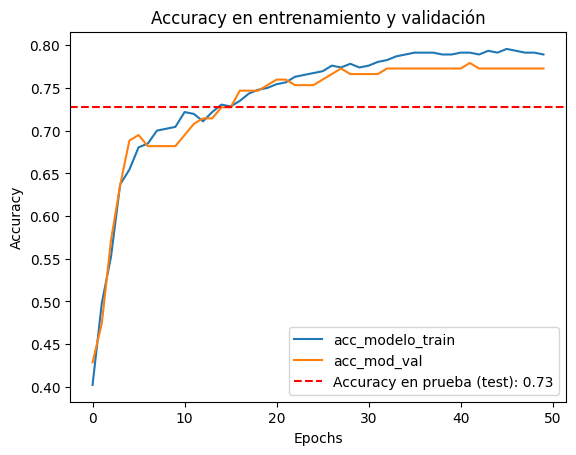

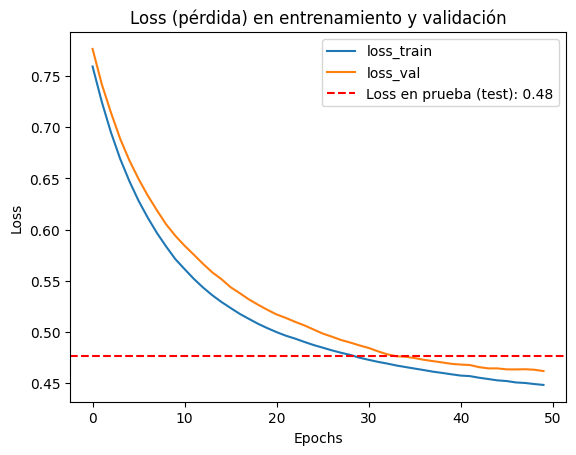

In [17]:
# Gráfica del accuracy del modelo en train y test
loss_test, acc_test = model.evaluate(X_test_s, y_test, verbose=0)
plt.plot(history.history['accuracy'], label = "acc_modelo_train")
plt.plot(history.history['val_accuracy'], label = "acc_mod_val")
plt.axhline(y=acc_test, color='r', linestyle='--', label=f"Accuracy en prueba (test): {acc_test:.2f}")
plt.title("Accuracy en entrenamiento y validación")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Gráfica de la pérdida en test y train
plt.plot(history.history['loss'], label = "loss_train")
plt.plot(history.history['val_loss'], label = "loss_val")
plt.axhline(y=loss_test, color='r', linestyle='--', label=f"Loss en prueba (test): {loss_test:.2f}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss (pérdida) en entrenamiento y validación")
plt.legend()
plt.show()

***Interpretación:***

- En la gráfica del *Accuracy* se busca que a medida que evolucionen en las *epoch* se incremente este valor tanto en entrenamiento como en prueba. Un valor alto en entrenamiento y bajo en prueba indica posible *overfitting*.

- En la gráfica de la *pérdida* se busca que ambas gráficas sean decrecientes, lo que indicaria que a medida que se avanzan en las *epoch* se va minimizando la función *loss*.



Para hacer algunas predicciones y revisar la matriz de confusión podemos utilizar lo siguiente.

In [18]:
predict = model.predict(X_test_s)
print(predict[0:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.6599649 ]
 [0.46741566]
 [0.09396777]
 [0.07624337]
 [0.12918942]
 [0.6299868 ]
 [0.4064158 ]
 [0.12990876]
 [0.54548925]
 [0.12052961]]


Calculamos las clases de acuerdo con las probabilidades y un umbral de 0.5

In [19]:
y_predict = np.where(model.predict(X_test_s) > 0.5, 1, 0)
y_predict[0:10]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       101
           1       0.62      0.55      0.58        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



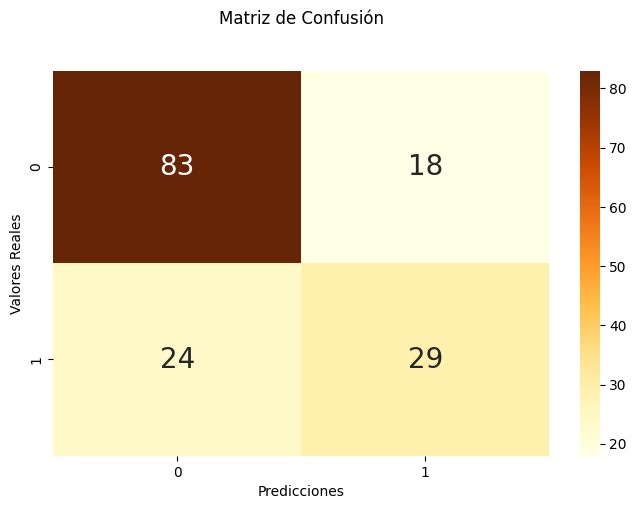

In [20]:
plt.rcParams['figure.figsize'] = (8, 5)
from sklearn import metrics
cm = confusion_matrix(y_test, y_predict)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                       # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_predict))

# <FONT SIZE=5 COLOR="purple"> 2. Tarjeta de Crédito </FONT>

***Objetivo del ejercicio***. Aplicar el modelo de clasificación ***KNN*** para determinar cuando se aprueba a un cliente una tarjeta de crédito o no, dependiendo de las otras variables.


***Contexto de los datos***

Este ejercicio se basa en un conjunto de datos que se publicó originalmente junto con la quinta edición del libro *Análisis Econométrico* de William Greene.

Este libro tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo están en *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Sin embargo, se anexan los datos como ***credict3*** y este trabajo se va a desarrollar con esta base.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.


## <FONT SIZE=5 COLOR="magenta"> 2.1 Carga y alistamiento de los datos</FONT>

1. Cargar los datos. Utilice la instrucción **na_values=[" "]**. ¿Para que sirve está instrucción?

In [58]:
# Cargar los datos
import pandas as pd
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
credit = pd.read_csv(url, na_values=[" "])

# Ver las primeras filas
credit.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [59]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1317 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   object 
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 123.8+ KB


el parámetro `na_values=[" "]` hace que pandas cargue registros que se componen únicamente de un espacio como NA o valores faltantes.

In [61]:
credit.majorcards.value_counts()

,count
majorcards,
1,1078
0,241


2. Explore cada una de las variables. ¿Encuentra inconsistencia en algunas de estas? Explique.

In [65]:
# Resumen general de los datos
credit.info()

# Valores únicos por columna para detectar posibles inconsistencias
for col in list(credit.select_dtypes(include='object').columns):
  print("----")
  print(f"Valores únicos en {col}: {credit[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1317 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   object 
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 123.8+ KB
----
Valores únicos en card: ['yes' 'no' 'Yes' 'No']
----
Valores únicos en owner: ['yes' 'no']
----
Valores únicos en selfemp: ['no' 'yes']
----
Valores únicos en months: ['54' '34' '58' '25' '64' '7' '77' '97' '65' '24' '36' '42' '26' '12o

Considero que los valores de la variable card son inconsistentes, pues son ['yes' 'no' 'Yes' 'No'], por lo que hay que unificarlos.

In [66]:
credit['card'] = credit['card'].apply(lambda x: 1 if x in ['yes','Yes'] else 0)
credit['owner'] = credit['owner'].apply(lambda x: 1 if x=='yes' else 0)
credit['selfemp'] = credit['selfemp'].apply(lambda x: 1 if x=='yes' else 0)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1317 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int64  
 7   selfemp      1319 non-null   int64  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   object 
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 123.8+ KB


3. ¿Encuentra valores faltantes? Si es de una variable categórica, elimínelos. En caso contrario sustitúyalos por el valor promedio de la variable.

A primera vista, del resultado del método `info()`, se puede observar que hacen falta 2 valores en la variable `age`. Al ser numérica, se sustituirá por el promedio de la variable.

In [67]:
credit['age'].fillna(credit['age'].mean(), inplace=True)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int64  
 7   selfemp      1319 non-null   int64  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   object 
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 123.8+ KB


4. Al momento de digitar algunos valores numéricos, la persona se equivocó y digitó algunas letras. Con esta indicación, identifique la(s) variables donde sucedió esto, además cuáles fueron esos valores, y realice los cambios que considere necesarios para no perder esa información.

En la variable `months` existen valores como '12o', que es de suponer que corresponde a 120, por lo que habría que convertirlo, para posteriormente convertir toda la variable a tipo entero. En general el procedimiento aquí sería convertir las 'o' por '0'.

In [68]:
credit['months'] = credit['months'].apply(lambda x: x.replace('o','0'))
credit['months'] = credit['months'].astype(int)

In [69]:
credit['months'].unique()

array([ 54,  34,  58,  25,  64,   7,  77,  97,  65,  24,  36,  42,  26,
       120, 168,  96,  60,  28, 115,  12,  18,  13,  38,  74,   9,  14,
        40, 108,  46,   2,   8, 156,  98,  30,   0,   6,  48, 216,  33,
        20,   3,  16, 182,  78,   4,  53, 144,   5,  94,  37,  15, 177,
       172, 288,  87,  69, 161,  72,   1,  51, 126,  27,  32,  52, 114,
       180,  41,  67,  62,  84, 264, 164,  55,  57,  50,  11,  10,  17,
        61, 128,  56,  45,  19, 252,  23,  35,  43, 300,  31,  76, 121,
        21, 230, 204, 179,  80,  59,  93,  49,  22, 408,  44,  63, 372,
       113, 106,  90, 540, 188, 146, 301, 192, 150,  85, 133, 131, 270,
       102, 151,  70, 125, 159, 101,  75, 117, 132, 158, 200, 210, 250,
       109, 240, 268, 162, 135,  66, 110, 134, 160, 122,  86,  95, 186,
        68, 138,  88, 244, 511,  29, 104,  47, 241, 147,  39, 236, 228,
       136,  91, 100, 347,  82, 194, 243, 222, 365, 207, 209, 234, 166,
        99, 229, 269, 124, 303, 218, 118, 201, 220, 148, 143, 16

In [72]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int64  
 7   selfemp      1319 non-null   int64  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 123.8 KB


## <FONT SIZE=5 COLOR="magenta"> 2.2 Definir las variables, Entrenamiento y Prueba y Escalar </FONT>

In [74]:
# Dividir en dos conjuntos
# las variables predictoras
X = credit.drop("card", axis=1)
# la variable objetivo
y = credit["card"]
# conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba
# definimos la función para escalar
escalar = StandardScaler()
# lo aplicamos a los conjuntos
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

## <FONT SIZE=5 COLOR="magenta"> 2.3 Modelo KNN </FONT>

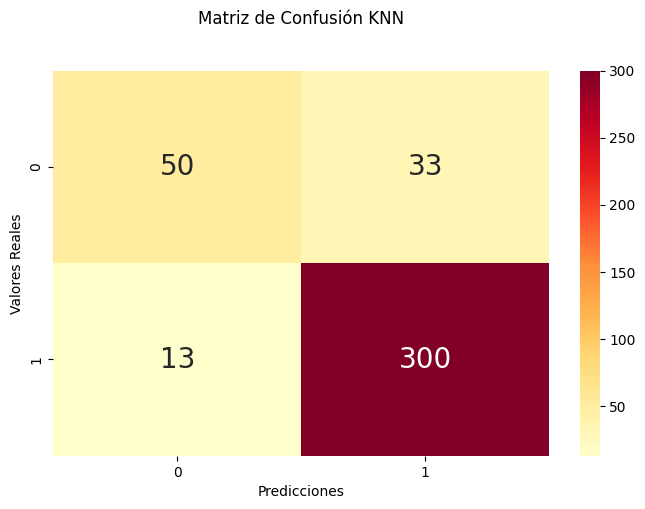

In [75]:
# definimos el modelo de vecinos más cercanos
KNN = KNeighborsClassifier(n_neighbors = 10,              # número de vecinos k=10
                           metric = 'euclidean')          # métrica euclideana

# entrenamos el modelo
KNN.fit(X_train_s,y_train)
# se utiliza la función .predict
y_pred = KNN.predict(X_test_s)
# Evaluamos el modelo
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión KNN', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones');

## <FONT SIZE=5 COLOR="magenta"> 2.4 Modelo Regresión Logística </FONT>

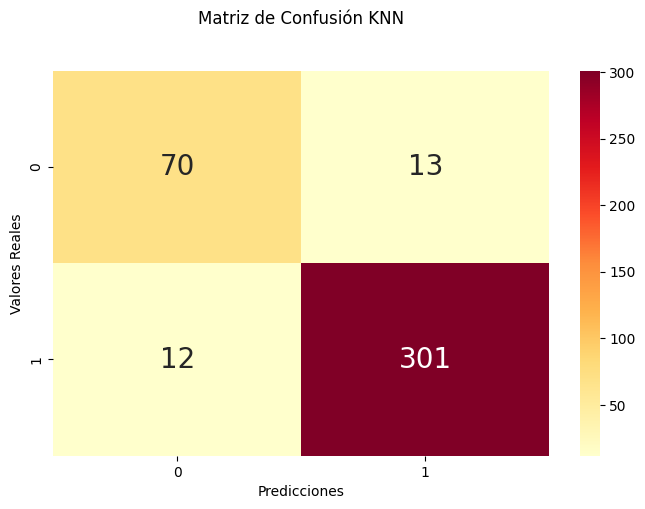

In [76]:
# definimos el modelo de regresión logística
Reg_log = LogisticRegression()
# entrenamos el modelo
Reg_log.fit(X_train_s,y_train)
# se utiliza la función .predict
y_pred = Reg_log.predict(X_test_s)
# Evaluamos el modelo
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión KNN', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones');

## <FONT SIZE=5 COLOR="magenta"> 2.5 Modelo de Árboles de Decisión </FONT>

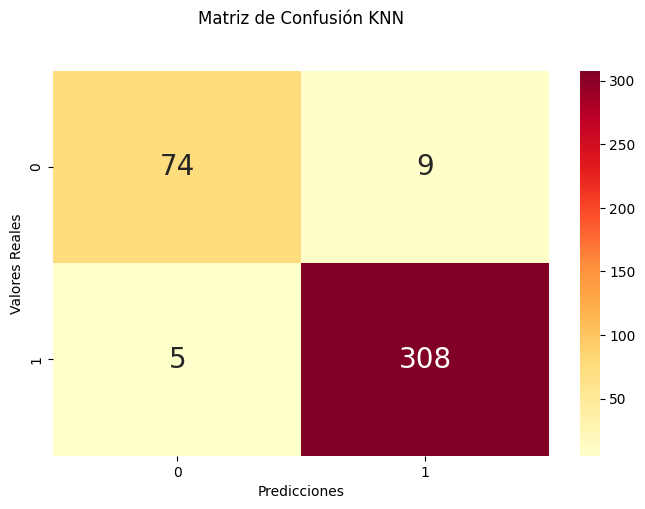

In [77]:
# definimos el modelo de árboles de decisión
Dec_Tree = DecisionTreeClassifier()
# entrenamos el modelo
Dec_Tree.fit(X_train_s,y_train)
# se utiliza la función .predict
y_pred = Dec_Tree.predict(X_test_s)
# Evaluamos el modelo
metrics=["accuracy", "recall" , "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})
# matriz de confusión
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión KNN', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones');

## <FONT SIZE=5 COLOR="magenta"> 2.6 Redes Neuronales </FONT>

Ahora, vamos a ver el funcionamiento usando las redes neuronales

In [78]:
# Dividir en dos conjuntos
# las variables predictoras
X = credit.drop("card", axis=1)
# la variable objetivo
y = credit["card"]

In [51]:
# dividir en los tres conjuntos
# 1. Dividimos en entrenamiento (60%) y el otro (40%) lo denominamos temporal ya que se va a volver a dividir
X_train, X_temp, y_train, y_temp = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    stratify=y,               # estratificamos con respecto a y (asegura que se mantenga la proporción de clases en y)
                                                    test_size = 0.4)          # tamaño del conjunto de prueba

X_val, X_test, y_val, y_test = train_test_split(X_temp,                       # variables predictoras
                                                y_temp,                       # variable de respuesta
                                                random_state = 0,             # semilla para que al ejecutar siempre de igual
                                                stratify=y_temp,              # estratificamos con respecto a y_temp
                                                test_size = 0.5)              # tamaño del conjunto de prueba

In [52]:
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_val_s = escalar.transform(X_val)
X_test_s = escalar.transform(X_test)

In [54]:
# 1. Definir el modelo secuencial
model = Sequential()

# 2. Definir las capas
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# 3. fijamos una semilla para que nos de lo mismo
np.random.seed(2)

# 4. Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 5. Entrenar el modelo usando el conjunto de validación explícitamente
history = model.fit(X_train_s,
                    y_train,
                    epochs=50,
                    validation_data=(X_val_s, y_val),
                    verbose=2)

# 6. Evaluar el modelo
print("\n--- Evaluación ---")
print("Pérdida y Accuracy en entrenamiento:", model.evaluate(X_train_s, y_train))
print("Pérdida y Accuracy en validación:  ", model.evaluate(X_val_s, y_val))
print("Pérdida y Accuracy en prueba (test):", model.evaluate(X_test_s, y_test))

Epoch 1/100
25/25 - 2s - 92ms/step - accuracy: 0.4842 - loss: 0.9029 - val_accuracy: 0.4924 - val_loss: 0.8348
Epoch 2/100
25/25 - 0s - 17ms/step - accuracy: 0.5563 - loss: 0.7738 - val_accuracy: 0.5682 - val_loss: 0.7194
Epoch 3/100
25/25 - 0s - 11ms/step - accuracy: 0.6321 - loss: 0.6744 - val_accuracy: 0.6515 - val_loss: 0.6316
Epoch 4/100
25/25 - 0s - 6ms/step - accuracy: 0.6865 - loss: 0.5986 - val_accuracy: 0.7235 - val_loss: 0.5661
Epoch 5/100
25/25 - 0s - 11ms/step - accuracy: 0.7370 - loss: 0.5417 - val_accuracy: 0.7500 - val_loss: 0.5156
Epoch 6/100
25/25 - 0s - 7ms/step - accuracy: 0.7661 - loss: 0.4971 - val_accuracy: 0.8068 - val_loss: 0.4759
Epoch 7/100
25/25 - 0s - 11ms/step - accuracy: 0.8003 - loss: 0.4619 - val_accuracy: 0.8333 - val_loss: 0.4455
Epoch 8/100
25/25 - 0s - 6ms/step - accuracy: 0.8217 - loss: 0.4332 - val_accuracy: 0.8409 - val_loss: 0.4212
Epoch 9/100
25/25 - 0s - 12ms/step - accuracy: 0.8382 - loss: 0.4093 - val_accuracy: 0.8485 - val_loss: 0.4011
Epoc

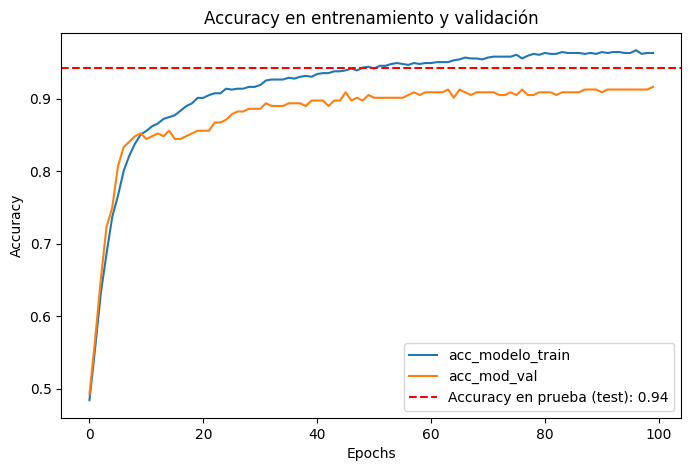

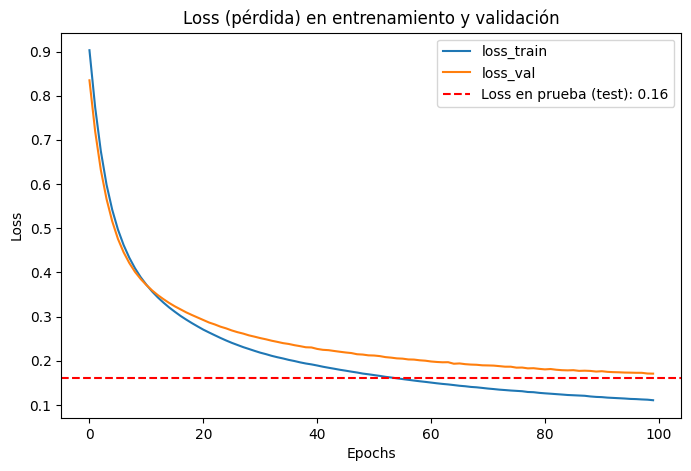

In [55]:
# Gráfica del accuracy del modelo en train y test
loss_test, acc_test = model.evaluate(X_test_s, y_test, verbose=0)
plt.plot(history.history['accuracy'], label = "acc_modelo_train")
plt.plot(history.history['val_accuracy'], label = "acc_mod_val")
plt.axhline(y=acc_test, color='r', linestyle='--', label=f"Accuracy en prueba (test): {acc_test:.2f}")
plt.title("Accuracy en entrenamiento y validación")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Gráfica de la pérdida en test y train
plt.plot(history.history['loss'], label = "loss_train")
plt.plot(history.history['val_loss'], label = "loss_val")
plt.axhline(y=loss_test, color='r', linestyle='--', label=f"Loss en prueba (test): {loss_test:.2f}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss (pérdida) en entrenamiento y validación")
plt.legend()
plt.show()

# <FONT SIZE=5 COLOR="purple"> Ejemplo 3. Datos Cáncer </FONT>

En este punto vamos a recordar como entrenar una red neuronal y las librerías que debemos usar.

Primero, revisaremos un poco sobre análisis exploratorio de los datos, luego entrenaremos el perceptrón multicapa y finalmente entrenaremos la red usando *keras* y *tensorflow*.

## <FONT SIZE=4 COLOR="blue"> 3.1 Contexto del problema </FONT>

Vamos a considerar un conjunto de datos de *kaggle* que se pueden encontrar en este link:  [DATOS 📰](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

**Acerca del conjunto de datos**

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen.

<br>
<center><img src="https://healthdataminer.com/wp-content/uploads/2019/11/celulas-palomas.png?raw=true" alt="centered image" width="600" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://healthdataminer.com/analitica-en-accion/modelos-no-supervisados-en-salud-clusterizando-celulas/ </FONT> <figcaption></center>

En el espacio tridimensional es el descrito en: [KP Bennett y OL Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Información de atributos:

1) Número de identificación

2) Diagnóstico (M = maligno, B = benigno)

3-32). Se calculan diez características de valor real para cada núcleo celular:

   - a) radio (media de las distancias desde el centro a los puntos del perímetro)
   - b) textura (desviación estándar de los valores de la escala de grises)
   - c) perímetro
   - d) área
   - e) uniformidad (variación local en las longitudes del radio)
   - f) compacidad (perímetro^2 / área - 1.0)
   - g) concavidad (severidad de las porciones cóncavas del contorno)
   - h) puntos cóncavos (número de porciones cóncavas del contorno)
   - i) simetría
   - j) dimensión fractal ("aproximación de la línea de costa" - 1)

La media, el error estándar y el "peor" o mayor (media de los tres
valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es *Mean Radius*, el campo 13 es *Radius SE*, el campo 23 es *Worst Radius*.

- Todos los valores de características se recodifican con cuatro dígitos significativos.

- Faltan valores de atributo: ninguno

- Distribución de clases: 357 benignos, 212 malignos

**Objetivo del ejercicio:** Determinar si una mujer tiene un diagnóstico de tumor maligno o benigno de acuerdo con una serie de valores de las características presentes en las imágenes celulares.
